In [194]:
import pandas as pd

In [195]:
pd.set_option('display.max_columns',None) # display all columns

df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Checking the uniquness of customerID

In [196]:
df['customerID'].value_counts()

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

The number of unique values of customerID is 7043 which is equal to the number of rows in the data set. Hence this variable is unique.

In [197]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

### Contract types vs Tenure

In [205]:
df_tenure_intervals =  pd.cut(df['tenure'],bins=20)
df_tenure_intervals.value_counts()

tenure
(-0.072, 3.6]    1062
(68.4, 72.0]      746
(3.6, 7.2]        550
(10.8, 14.4]      401
(14.4, 18.0]      363
(64.8, 68.4]      363
(7.2, 10.8]       358
(21.6, 25.2]      348
(50.4, 54.0]      286
(57.6, 61.2]      279
(28.8, 32.4]      278
(32.4, 36.0]      267
(46.8, 50.4]      266
(39.6, 43.2]      264
(61.2, 64.8]      222
(54.0, 57.6]      209
(25.2, 28.8]      208
(18.0, 21.6]      207
(43.2, 46.8]      186
(36.0, 39.6]      180
Name: count, dtype: int64

In [199]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [200]:
df_tenure_agg = df.groupby(df_tenure_intervals)['Contract'].value_counts().to_frame(name='ContractCount')
pivoted_tenure_table = df_tenure_agg.pivot_table(index = 'tenure',columns='Contract',values=['ContractCount'])
pivoted_tenure_table.reset_index(inplace=True)
pivoted_tenure_table


tenure  ContractCount                  
Contract                Month-to-month One year Two year
0         (-0.072, 3.6]           1025       21       16
1            (3.6, 7.2]            501       32       17
2           (7.2, 10.8]            302       35       21
3          (10.8, 14.4]            305       64       32
4          (14.4, 18.0]            279       62       22
5          (18.0, 21.6]            150       39       18
6          (21.6, 25.2]            218       89       41
7          (25.2, 28.8]            124       68       16
8          (28.8, 32.4]            177       73       28
9          (32.4, 36.0]            136       88       43
10         (36.0, 39.6]             83       62       35
11         (39.6, 43.2]            123       93       48
12         (43.2, 46.8]             68       66       52
13         (46.8, 50.4]             90      100       76
14         (50.4, 54.0]             75      121       90
15         (54.0, 57.6]             63       75       71
16         (57.6, 61.2]             62      102      115
17         (61.2, 64.8]             32       76      114
18         (64.8, 68.4]             45      112      206
19         (68.4, 72.0]             17       95      634

In [201]:
pivoted_tenure_table['tenure_mid_range'] = pivoted_tenure_table['tenure'].apply(lambda row: (row.left + row.right)/2)
pivoted_tenure_table

tenure  ContractCount                   tenure_mid_range
Contract                Month-to-month One year Two year                 
0         (-0.072, 3.6]           1025       21       16            1.764
1            (3.6, 7.2]            501       32       17            5.400
2           (7.2, 10.8]            302       35       21            9.000
3          (10.8, 14.4]            305       64       32           12.600
4          (14.4, 18.0]            279       62       22           16.200
5          (18.0, 21.6]            150       39       18           19.800
6          (21.6, 25.2]            218       89       41           23.400
7          (25.2, 28.8]            124       68       16           27.000
8          (28.8, 32.4]            177       73       28           30.600
9          (32.4, 36.0]            136       88       43           34.200
10         (36.0, 39.6]             83       62       35           37.800
11         (39.6, 43.2]            123       93       48           41.400
12         (43.2, 46.8]             68       66       52           45.000
13         (46.8, 50.4]             90      100       76           48.600
14         (50.4, 54.0]             75      121       90           52.200
15         (54.0, 57.6]             63       75       71           55.800
16         (57.6, 61.2]             62      102      115           59.400
17         (61.2, 64.8]             32       76      114           63.000
18         (64.8, 68.4]             45      112      206           66.600
19         (68.4, 72.0]             17       95      634           70.200

<Axes: title={'center': 'Relationship between the tenure and the number of Two year based contract'}>

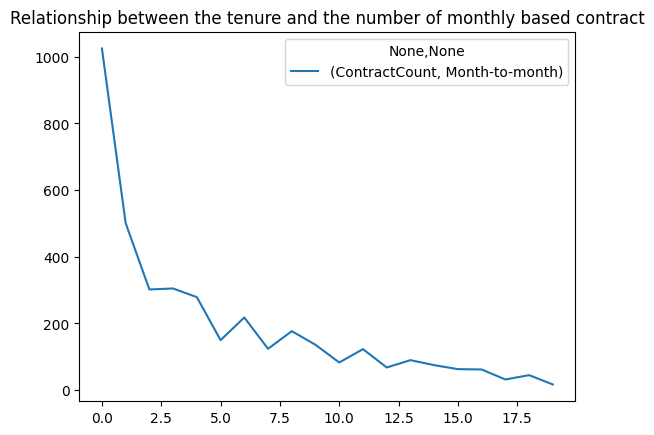

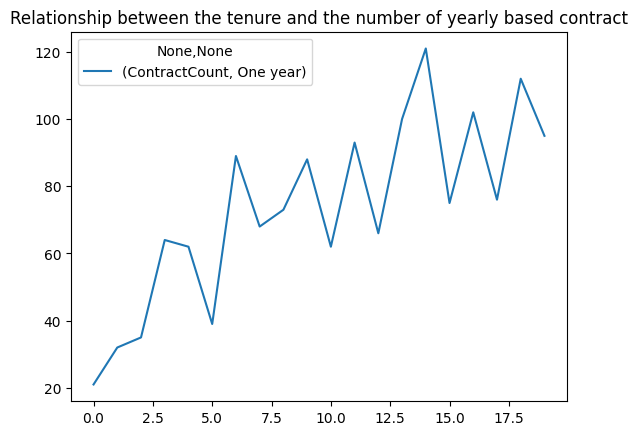

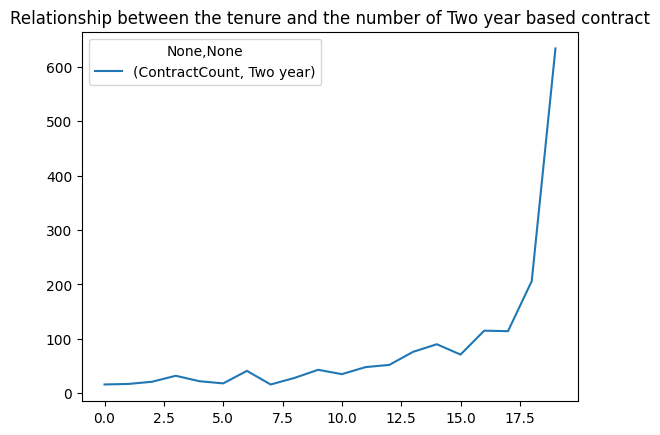

In [204]:

pivoted_tenure_table.plot.line(y=('ContractCount','Month-to-month'),title="Relationship between the tenure and the number of monthly based contract")

pivoted_tenure_table.plot.line(y=('ContractCount','One year'),title="Relationship between the tenure and the number of yearly based contract")

pivoted_tenure_table.plot.line(y=('ContractCount','Two year'),title="Relationship between the tenure and the number of Two year based contract")

